<a href="https://colab.research.google.com/github/lakshay-middha/Credit_fraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.chdir('drive/MyDrive')

In [63]:
import pandas as pd
data = pd.read_csv('creditcard.csv')

In [64]:
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## About the Dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The data can be found at: [https://www.kaggle.com/mlg-ulb/creditcardfraud](https://)

In [66]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [67]:
print(len(fraud))
print(len(normal))

492
284315


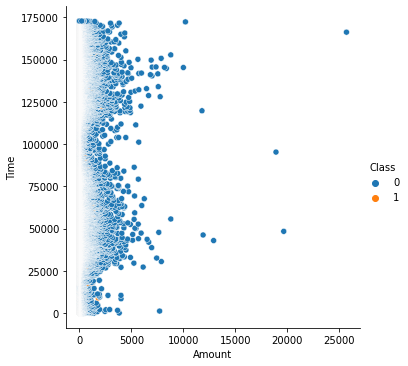

In [9]:
sns.relplot(x = 'Amount', y = 'Time',hue = 'Class', data = data)
# fraudlent transactions can barely be seen

In [68]:
print("Mean of amounts column: {}".format(data['Amount'].mean()))
print("Count of null values: {}".format(data['Amount'].isnull().sum()))
print("percentage of fraud transcations: {} %".format(100*len(data[data['Class'] == 1])/len(data['Class'])))

Mean of amounts column: 88.34961925087359
Count of null values: 0
percentage of fraud transcations: 0.1727485630620034 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


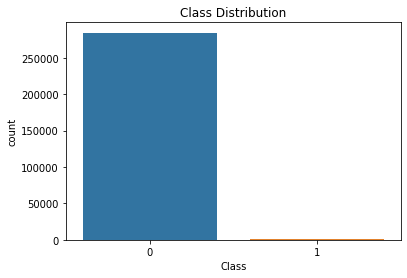

In [69]:
sns.countplot('Class', data= data)
plt.title('Class Distribution')
plt.show()

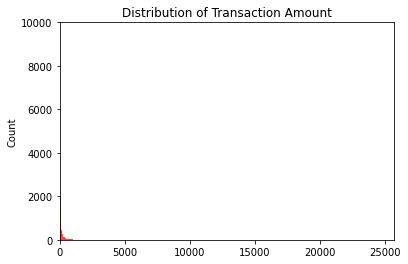

In [70]:
amt_val = data['Amount'].values
time_val = data['Time'].values


sns.histplot(data = data, x = amt_val , color = 'r',stat = 'count')
plt.title('Distribution of Transaction Amount')
plt.xlim([min(amt_val),max(amt_val)])
plt.ylim([0,10000])
plt.show()

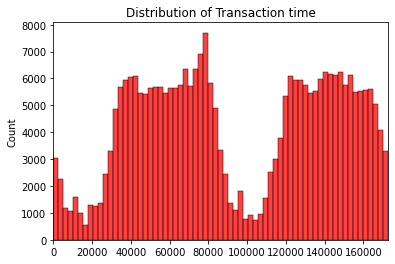

In [71]:
sns.histplot(data = data, x = time_val , color = 'r')
plt.title('Distribution of Transaction time')
plt.xlim([min(time_val),max(time_val)])
plt.show()

## Scaling and Distributing

In [75]:
from sklearn.preprocessing import RobustScaler, StandardScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
# log scaler 
data['log_amount'] = np.log(data['Amount']+0.01)
data['rob_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['std_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

# check for different scalers and use the best one (log scaler)

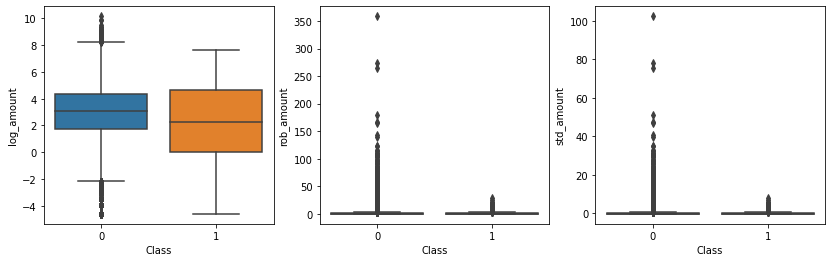

In [78]:
fig, ax  = plt.subplots(1,3, figsize = (14,4))
sns.boxplot(ax=ax[0], x = data['Class'] , y = data['log_amount'])
sns.boxplot(ax=ax[1], x = data['Class'] , y = data['rob_amount'])
sns.boxplot(ax=ax[2], x = data['Class'] , y = data['std_amount'])
plt.show()
# log scaler gives a decent distribution of amount and we will proceed further with this.

In [80]:
data['Amount'] = data['log_amount']
data.drop(['rob_amount',"std_amount",'log_amount'], axis = 1, inplace=True)
data.head()
# the time and amount columns are scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495,0


## Random Under Sampling

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

sss = StratifiedShuffleSplit(n_splits = 5, random_state = None)

In [82]:
for train_idx, test_idx in sss.split(X,y):
  org_Xtrain, org_Xtest = X.iloc[train_idx],X.iloc[test_idx]
  org_ytrain, org_ytest = y.iloc[train_idx],y.iloc[test_idx]  

In [83]:
# to check if training set and the testing set is distributed with the same percentage
# of +ve and -ve samples
org_Xtrain = org_Xtrain.values
org_Xtest = org_Xtest.values
org_ytrain = org_ytrain.values
org_ytest = org_ytest.values

In [84]:
train_cnts = np.unique(org_ytrain, return_counts=True)[1]
test_cnts = np.unique(org_ytest, return_counts=True)[1]

print("Ratio for training set is : {}".format(100*train_cnts[1]/(sum(train_cnts))))
print("Ratio for testing set is : {}".format(100*test_cnts[1]/(sum(test_cnts))))

Ratio for training set is : 0.17282679088348432
Ratio for testing set is : 0.17204452090867595


In [85]:
# creating a balanced dataset

#shuffling data
data = data.sample(frac = 1)

fraud_trans = data.loc[data['Class'] == 1]
non_fraud_trans = data.loc[data['Class'] == 0][:fraud_trans.shape[0]]

df = pd.concat([fraud_trans, non_fraud_trans])

df = df.sample(frac = 1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112851,72828.0,-2.769049,2.406173,-0.201663,-1.231108,-1.261623,-0.620013,-1.304749,-1.227983,0.007054,-0.581104,-0.424898,0.691067,-0.251471,0.985553,0.511176,0.432838,0.441992,-0.850703,-1.240566,-0.938153,2.485004,-0.818265,0.557655,0.380453,-0.263713,0.737907,-0.764089,-0.079357,-0.248461,0
183910,126009.0,-0.958954,-6.204813,-1.474958,0.791532,-2.875647,1.492896,0.255668,0.113952,3.158477,-1.449831,-2.508586,-0.020871,-1.114067,-0.742208,-0.757559,0.049938,0.089945,0.666092,0.479167,2.867453,0.925605,-0.290870,-1.211452,0.234952,-0.877900,0.642199,-0.263340,0.222531,7.335641,0
241069,150869.0,2.002352,0.075215,-1.618153,0.341536,0.395342,-0.576969,0.063434,-0.064411,0.251284,-0.213976,1.305794,0.804608,-0.261031,-0.589441,-0.437744,0.412449,0.355890,0.066718,0.203307,-0.161534,-0.295119,-0.794828,0.354892,0.604837,-0.335625,0.148495,-0.065255,-0.039087,1.791759,0
69822,53597.0,-1.814338,1.914688,-0.016314,0.097524,-0.875306,-0.711834,-0.501176,1.363448,-0.506314,-0.786298,-0.551541,0.026773,-0.596859,0.620992,1.156622,0.473488,0.826770,-0.388945,-0.486991,-0.191315,-0.134065,-0.714575,0.166508,-0.004080,-0.161046,0.102036,-0.134699,-0.059860,2.678965,0
10568,17520.0,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,11.027059,-16.388054,0.363921,-17.230202,-0.437488,-10.122392,-13.639209,-4.986457,1.126784,1.455878,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,0.009950,1


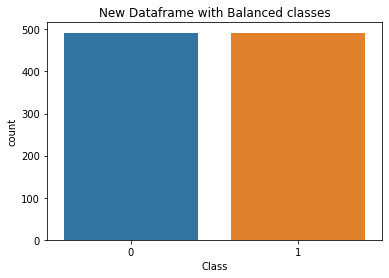

In [86]:
# check if the new dataframe df is equally distributed or not
sns.countplot(data = df,x = 'Class', )
plt.title("New Dataframe with Balanced classes")
plt.show()

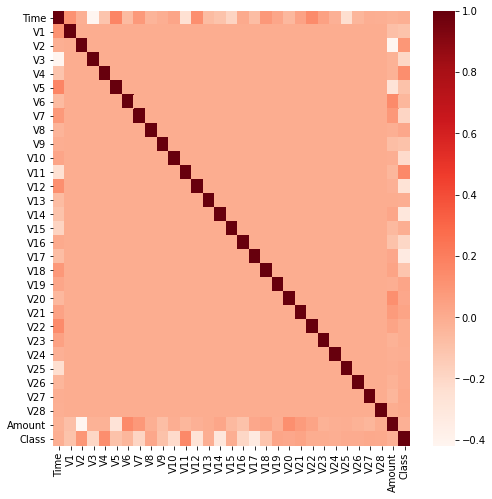

In [87]:
# feature correlation

plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),cmap = 'Reds')
plt.show()

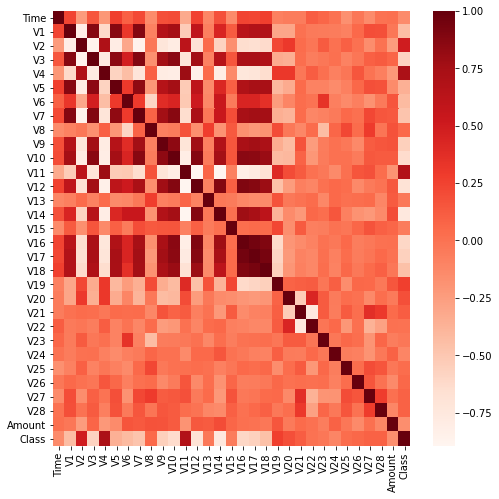

In [88]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap='Reds')
plt.show()

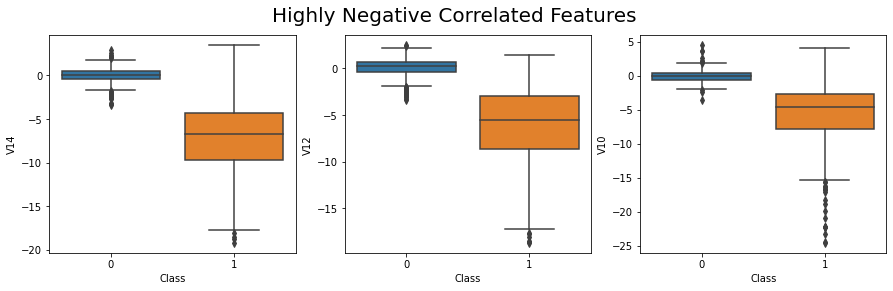

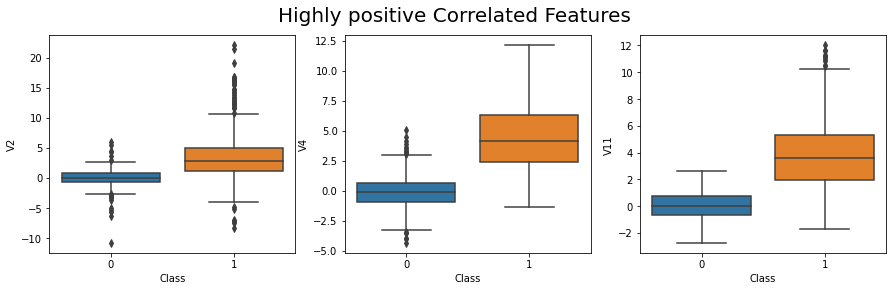

In [24]:
# features 2, 4, and 11 highly positively correlated with the class
# featutes 14, 12, 10 are highly negatively correlated with the class

# checking for outliers using Box plot
# negatively correlated
fig,axes = plt.subplots(1,3, figsize = (15,4))
l = ["V14","V12", "V10"]
for i,j in enumerate(l):
  plt.suptitle("Highly Negative Correlated Features", fontsize = "20")
  sns.boxplot(ax = axes[i],data = df,x ="Class", y = df[j])

# positively correlated features
ldash = ['V2','V4','V11']
fig,axes = plt.subplots(1,3,figsize = (15,4))
fig.suptitle("Highly positive Correlated Features", fontsize = "20")
for i,j in enumerate(ldash):
  #plt.suptitle("Highly positive Correlated Features", fontsize = "20")
  sns.boxplot(ax = axes[i],data = df,x ="Class", y = df[j])


**From the box plot we can visualize that there are many outliers present in these features. Our aim is to remove the extreme outliers from the features that are highly correlated with the target variable. This will reduces some skewness in the model**

<Figure size 360x360 with 0 Axes>

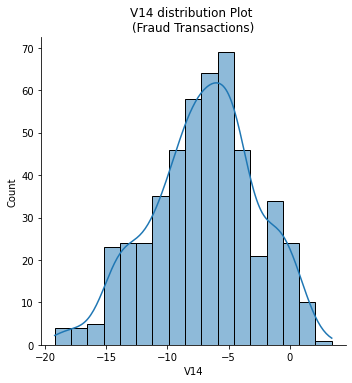

<Figure size 360x360 with 0 Axes>

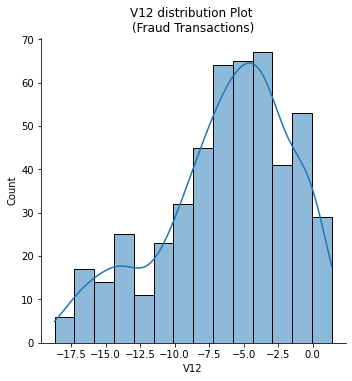

<Figure size 360x360 with 0 Axes>

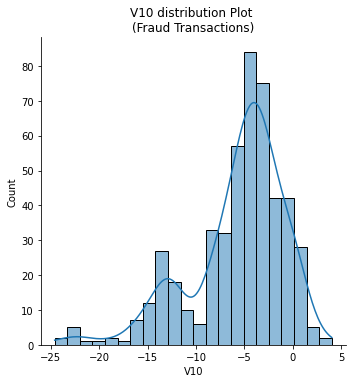

In [89]:
# ploting features with negative correlation
new_df = df[df['Class'] == 1]
plt.figure(figsize = (5,5))
sns.displot(data = new_df, 
            x = new_df['V14'], 
            kind = 'hist',
            kde = True)
plt.title('V14 distribution Plot \n(Fraud Transactions)')
plt.show()

plt.figure(figsize = (5,5))
sns.displot(data = new_df, 
          x = new_df['V12'], 
          kind = 'hist',
          kde = True)
plt.title('V12 distribution Plot \n(Fraud Transactions)')
plt.show()

plt.figure(figsize = (5,5))
sns.displot(data = new_df, 
          x = new_df['V10'], 
          kind = 'hist',
          kde = True)
plt.title('V10 distribution Plot \n(Fraud Transactions)')
plt.show()

**Using Inter Quartile range method to remove outliers form negatively correlated features**

In [90]:
# removing outliers from feature V14 with fraud transactions
v14_fraud = df[df['Class'] == 1]['V14'].values
qtr_25 = np.percentile(v14_fraud, 25)
qtr_75 = np.percentile(v14_fraud, 75)
iqr = 1.5*(qtr_75 - qtr_25)

outliers_14 = [ x for x in v14_fraud if x < (qtr_25 - iqr) or x > (qtr_75 + iqr)]
print("Number of outliers removed: {}".format(len(outliers_14)))
df = df.drop(df[(df['V14']>qtr_75 + iqr) | (df['V14']<qtr_25-iqr)].index)


# removing outliers from feature V12 with fraud transactions
v12_fraud = df[df['Class'] == 1]['V12'].values
qtr_25 = np.percentile(v14_fraud, 25)
qtr_75 = np.percentile(v14_fraud, 75)
iqr = 1.5*(qtr_75 - qtr_25)

outliers_12 = [ x for x in v12_fraud if x < (qtr_25 - iqr) or x > (qtr_75 + iqr)]
print("Number of outliers removed: {}".format(len(outliers_12)))
df = df.drop(df[(df['V12']>qtr_75 + iqr) | (df['V12']<qtr_25-iqr)].index)

# removing outliers from feature V10 with fraud transactions
v10_fraud = df[df['Class'] == 1]['V10'].values
qtr_25 = np.percentile(v14_fraud, 25)
qtr_75 = np.percentile(v14_fraud, 75)
iqr = 1.5*(qtr_75 - qtr_25)

outliers_10 = [ x for x in v10_fraud if x < (qtr_25 - iqr) or x > (qtr_75 + iqr)]
print("Number of outliers removed: {}".format(len(outliers_10)))
df = df.drop(df[(df['V10']>qtr_75 + iqr) | (df['V10']<qtr_25-iqr)].index)

print("final shape of dataset: {}".format(df.shape))

Number of outliers removed: 4
Number of outliers removed: 4
Number of outliers removed: 12
final shape of dataset: (963, 31)


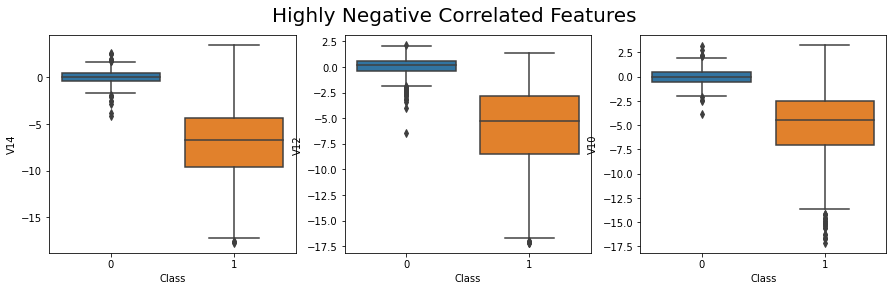

In [91]:
# negatively correlated features with fewer outliers
fig,axes = plt.subplots(1,3, figsize = (15,4))
l = ["V14","V12", "V10"]
for i,j in enumerate(l):
  plt.suptitle("Highly Negative Correlated Features", fontsize = "20")
  sns.boxplot(ax = axes[i],data = df,x ="Class", y = df[j])

In [97]:
print(df.shape)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(963, 31)
(963, 30) (963,)


## Building Predictive Models for undersampled data

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [99]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [101]:
classifiers = {
    "LogisticsRegression": LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
  classifier.fit(x_train,y_train)
  training_score = cross_val_score(classifier, x_train,y_train)
  testing_score = cross_val_score(classifier, x_test, y_test)

  print("Classifier: " ,key)
  print("Accuracy score on training set: {}".format(round(training_score.mean(),4)))
  print("Accuracy score on test set: {}".format(round(testing_score.mean(),4)))
  print("-- "*10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classifier:  LogisticsRegression
Accuracy score on training set: 0.9266
Accuracy score on test set: 0.9377
-- -- -- -- -- -- -- -- -- -- 
Classifier:  RandomForest
Accuracy score on training set: 0.9349
Accuracy score on test set: 0.9502
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Support Vector Classifier
Accuracy score on training set: 0.5277
Accuracy score on test set: 0.5933
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Decision Tree Classifier
Accuracy score on training set: 0.903
Accuracy score on test set: 0.9253
-- -- -- -- -- -- -- -- -- -- 


### Finding optimal Parameters using Grid search 

In [ ]:
from sklearn.model_selection import GridSearchCV

# logistics regression hyper parameters
log_reg_hyp = {"penalty":['none','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['liblinear', 'lbfgs']}

grid_log_reg = GridSearchCV(LogisticRegression(max_iter = 500), log_reg_hyp)
grid_log_reg.fit(x_train,y_train)
log_reg_best_est = grid_log_reg.best_estimator_

In [108]:
# Random Forest params
weights = np.linspace(0.05,0.65, 10)
grid_rf = GridSearchCV(
    RandomForestClassifier(n_jobs=-1, verbose=1, random_state=42), 
    param_grid={'class_weight':[{0: x, 1: 1.0-x} for x in weights]},
    scoring='f1',
    cv=3,
)
grid_rf.fit(x_train,y_train)
rf_best_est = grid_rf.best_estimator_

# SVC hyper params
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train,y_train)
svc_best_est = grid_svc.best_estimator_

# Decision Tree params
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_clf_best_est = grid_tree.best_estimator_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0

In [109]:
best_estimator = {'logistic regression':log_reg_best_est,'Random Forest':rf_best_est,
                  'SVC':svc_best_est, 'Decision Tree':tree_clf_best_est}
for key, value in best_estimator.items():
  training_score = cross_val_score(value, x_train, y_train)
  testing_score = cross_val_score(value, x_test, y_test)
  print("Classifier: ", key)
  print("Accuracy score on training set: {}".format(round(training_score.mean(),4)))
  print("Accuracy score on test set: {}".format(round(testing_score.mean(),4)))
  print("-- "*10)

Classifier:  logistic regression
Accuracy score on training set: 0.928
Accuracy score on test set: 0.9418
-- -- -- -- -- -- -- -- -- -- 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent work

Classifier:  Random Forest
Accuracy score on training set: 0.9349
Accuracy score on test set: 0.9585
-- -- -- -- -- -- -- -- -- -- 
Classifier:  SVC
Accuracy score on training set: 0.9044
Accuracy score on test set: 0.8836
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Decision Tree
Accuracy score on training set: 0.9335
Accuracy score on test set: 0.9419
-- -- -- -- -- -- -- -- -- -- 


In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg_best_est, x_train,y_train, cv = 5)
rf_pred = cross_val_predict(rf_best_est, x_train,y_train,cv = 5)
svc_pred = cross_val_predict(svc_best_est, x_train,y_train, cv = 5)
tree_pred = cross_val_predict(tree_clf_best_est, x_train,y_train, cv = 5)

print("Logistic Regression ROC accuracy score: {}".format(roc_auc_score(y_train,log_reg_pred)))
print("Random forest ROC accuracy score: {}".format(roc_auc_score(y_train,rf_pred)))
print("SVC ROC accuracy score: {}".format(roc_auc_score(y_train,svc_pred)))
print("Decision Tree ROC accuracy score: {}".format(roc_auc_score(y_train,tree_pred)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0

Logistic Regression ROC accuracy score: 0.9278681983164131
Random forest ROC accuracy score: 0.9346324731232304
SVC ROC accuracy score: 0.9039150686403156
Decision Tree ROC accuracy score: 0.9333931873815389


**All the classifiers gave an accuracy of more than 90% but random forest is slightly better than decision tree and logistic regression**


In [113]:
from sklearn.metrics import classification_report
temp = rf_best_est.predict(org_Xtest)
print(classification_report(temp,org_ytest))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     27719
           1       0.98      0.06      0.12       762

    accuracy                           0.97     28481
   macro avg       0.98      0.53      0.55     28481
weighted avg       0.98      0.97      0.96     28481



[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


From the above report it can be seen that the classifier which worked well in undersampled data was not of much help in predicting on true test data.

Clearly the recall and f1 score of class 1 are very low, so we need to try some other measures

# Creating OverSampled Balanced dataset

In [114]:
from collections import Counter
print('The shape of original x_train : {}'.format(org_Xtrain.shape))
print('The shape of original x_test : {}'.format(org_Xtest.shape))

print("Label count : {}".format(Counter(org_ytrain)))

The shape of original x_train : (256326, 30)
The shape of original x_test : (28481, 30)
Label count : Counter({0: 255883, 1: 443})


### SMOTE (Synthetic Minority Over sampling Technique)

In [115]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
# SMOTE
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(org_Xtrain, org_ytrain)
print('The shape of original x_train : {}'.format(x_smote.shape))
print('The shape of original x_test : {}'.format(y_smote.shape))
print("Label count : {}".format(Counter(y_smote)))
print("--"*10)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The shape of original x_train : (511766, 30)
The shape of original x_test : (511766,)
Label count : Counter({0: 255883, 1: 255883})
--------------------


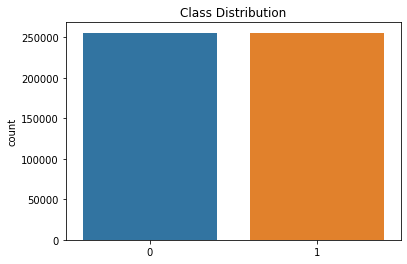

In [119]:
sns.countplot(x = y_smote)
plt.title('Class Distribution')
plt.show()

In [44]:
xtrain_smote, xval_smote,ytrain_smote, yval_smote = train_test_split(x_smote,
                                                                           y_smote,
                                                                           test_size = 0.3, 
                                                                           random_state = 42)

In [123]:
print("shape of x_train set: {}".format(xtrain_smote.shape))
print("shape of y_train set: {}".format(ytrain_smote.shape))
print("shape of xval_test set: {}".format(xval_smote.shape))
print("shape of yval_test set: {}".format(yval_smote.shape))

shape of x_train set: (358236, 30)
shape of y_train set: (358236,)
shape of xval_test set: (153530, 30)
shape of yval_test set: (153530,)


In [124]:
classifiers = {
    "LogisticsRegression": LogisticRegression(solver = 'liblinear', multi_class='ovr'),
    "Random Forest": RandomForestClassifier(verbose = 1, n_jobs = -1, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

for key, classifier in classifiers.items():
  classifier.fit(xtrain_smote,ytrain_smote)
  training_score = cross_val_score(classifier,xtrain_smote,ytrain_smote)
  testing_score = cross_val_score(classifier, xval_smote, yval_smote)

  print("Classifier: " ,key)
  print("Accuracy score on training set: {}".format(round(training_score.mean(),4)))
  print("Accuracy score on test set: {}".format(round(testing_score.mean(),4)))
  print("-- "*10)

Classifier:  LogisticsRegression
Accuracy score on training set: 0.948
Accuracy score on test set: 0.9475
-- -- -- -- -- -- -- -- -- -- 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs

Classifier:  Random Forest
Accuracy score on training set: 0.9999
Accuracy score on test set: 0.9997
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Decision Tree Classifier
Accuracy score on training set: 0.9973
Accuracy score on test set: 0.9947
-- -- -- -- -- -- -- -- -- -- 


In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf = classifiers['Random Forest']
temp = clf.predict(org_Xtest)
print(confusion_matrix(temp,org_ytest))
print('--'*10)
print(classification_report(temp,org_ytest))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


[[28432     3]
 [    0    46]]
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.94      1.00      0.97        46

    accuracy                           1.00     28481
   macro avg       0.97      1.00      0.98     28481
weighted avg       1.00      1.00      1.00     28481



[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


In [127]:
clf = classifiers['Decision Tree Classifier']
temp = clf.predict(org_Xtest)
print(classification_report(temp,org_ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28402
           1       0.10      0.06      0.08        79

    accuracy                           1.00     28481
   macro avg       0.55      0.53      0.54     28481
weighted avg       0.99      1.00      1.00     28481



### Random forest outperforms the other two classifier with accuracy of more than 99% and high f1 score for both the fraud and non fraud class


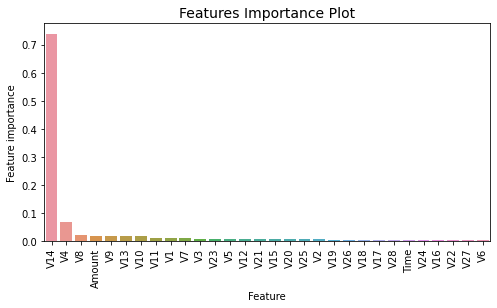

In [140]:
# identifying the feature importance
predictors = [x for x in data.columns]
predictors = predictors[:-1]
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (8,4))
plt.title('Features Importance Plot',fontsize=14)
sns.barplot(x='Feature',y='Feature importance',data=tmp)
plt.xticks(rotation = 90)
plt.show()  